<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [2]:
iris            = pd.read_csv("./data/iris.csv")
lenses          = pd.read_csv("./data/lenses_final.csv")
car             = pd.read_csv("./data/cars.csv")
horsecolic      = pd.read_table("./data/horse-colic.data")

C:\Users\vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


<h2 style="text-align:center; margin:40px"> Regressão Logística </h2>

![](img/logreg.png)

A <b>regressão logística</b> é um tipo de regressão utilizada no caso de resposta binária. O valor retornado pela regressão logística representa a probabilidade de ocorrer o evento de interesse.

Assim como na regressão linear, queremos encontrar os parâmetros $\beta$ que fazem o modelo melhor se ajustar aos dados. Partimos de uma função linear:

$$ f_{\beta}(x) = \sum_{i = 0}^{N} \beta_ix_i$$

E "encapsulamos" a função linear com uma função (chamada de <b>logística</b> ou <b>sigmoide</b>) que mapeia o espaço dos números reais em um espaço reduzido entre 0 e 1:

$$ \sigma(z) = \frac{1}{1 + e^{-z}}$$

<b>O novo modelo é dado por:</b>

$$ f_{\beta}(x) = \sigma(\sum_{i = 0}^{N} \beta_ix_i) = \frac{1}{1 + e^{-\sum_{i = 0}^{N} \beta_ix_i}}$$

Também substituímos a <b>função de erro</b> por uma função mais adequada para a variável resposta binária:

$$ L(x_i, y_i) = \color{red}{-y_i\log(f_{\beta}(x_i))}\color{blue}{-(1-y_i)\log(1-f_{\beta}(x_i))}$$

E mais uma vez aplicamos o método de gradiente descendente para encontrar o valor ótimo de $\beta$.

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Mas antes vamos dar uma olhada na base que usaremos com os próximos algoritmos de classificação

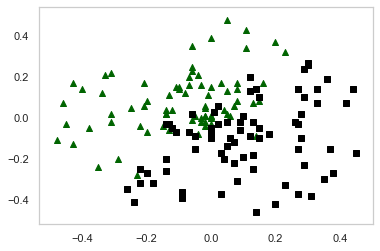

In [3]:
baseDados = pd.read_csv('data/base_regressao_logistica.csv')
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = ',')

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

No regressor logístico do _sklearn_ utilizamos um parâmetro de regularização $ C $.

A fórmula de custo $J(f_{\beta}, y)$ recebe um termo adicional $\frac{1}{C} \sum_{i=1}^{n} \beta_i^2$ (regularização $l_2$).

O parâmetro $ C $ controla quão grandes os coeficientes $ \beta_i $ podem se tornar. Quanto menor o valor de $ C $, mais penalizado o modelo será por utilizar os coeficientes.

In [5]:
LR = LogisticRegression(C = 1)
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
LR.fit(X,Y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

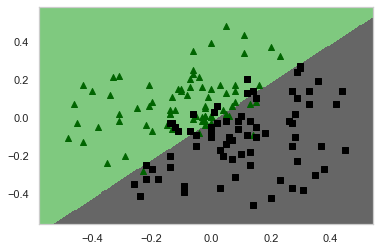

In [6]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = LR.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

Agora iremos treinar um modelo mais complexo. Agora teremos atributos polinomiais, e então, além de ter coeficientes para as variáveis preditivas, também teremos para suas combinações polinomiais, como por exemplo $ x_1^2, x_2^2, x_1x_2, x_1^2x_2, x_1x_2^2, x_1^3, x_2^3 $. Por exemplo, para atributos quadráticos temos $ f_{\beta}(x) = {\beta_0} + {\beta_1}x_1 + {\beta_2}x_1^2 + {\beta_3}x_2 + {\beta_4}x_2^2 + {\beta_5}x_1x_2 $

In [7]:
LR = LogisticRegression(C = 1e10)
grau = 10
X = PolynomialFeatures(degree = grau).fit_transform(baseDados[baseDados.columns[:-1]])
Y = baseDados['Y']
LR.fit(X,Y)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

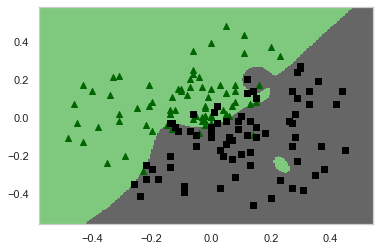

In [8]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = LR.predict(PolynomialFeatures(degree = grau).fit_transform(np.c_[xx.ravel(),yy.ravel()]))

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = LR.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

Vamos utilizar os mesmos dados empregados no modelo de regressão linear para uma outra tarefa. Classificar o indivíduo nos sexos masculino e feminino dado o seu peso e altura. 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.metrics import classification_report

In [10]:
pesos = pd.read_csv('weights.csv', sep=';')

Como já fizemos uma análise exploratória de dados no exercício de regressão linear, vamos pular essa parte e seguirmos direto para a remoção dos outliers.

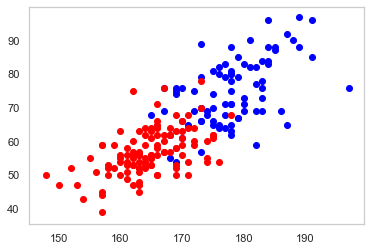

In [11]:
pesos = pesos[pesos.weight <= 100].reset_index(drop=True)
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Observe que, apesar de uma leve sobreposição, conseguimos separar os indivídos do sexo masculino com uma reta. O que vamos encontrar com nossa Regressão Logística é a reta que melhor separa esses dados

In [12]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

,sex,weight,height,M
0,M,77,182,1
1,F,58,161,0
2,F,53,161,0
3,M,68,177,1
4,F,59,157,0


In [13]:
X = pesos[['weight', 'height']]
y = pesos.M

In [46]:
X = pesos[['M', 'height']]
y = pesos.weight

In [47]:
reg_log = LogisticRegression()
reg_log.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Assim como na regressão linear, podemos observar os coeficientes

In [48]:
reg_log.coef_

array([[-0.26248059, -0.03137186],
       [-0.25857588, -0.0315893 ],
       [-0.26248059, -0.03137186],
       [-0.47758773, -0.02685321],
       [-0.78024294, -0.02322421],
       [-0.27084656, -0.03094563],
       [-0.26796944, -0.03108653],
       [-1.1363206 , -0.01856826],
       [-0.65248236, -0.02438985],
       [-1.13362441, -0.01891032],
       [-1.22287117, -0.01753277],
       [-0.78119479, -0.01713847],
       [-0.85908588, -0.01726812],
       [-0.85568908, -0.01737738],
       [-0.53610914, -0.01955638],
       [-0.81681307, -0.02151462],
       [-0.77487273, -0.01757317],
       [-0.82605976, -0.02106256],
       [-0.24976302, -0.02210521],
       [-0.51278264, -0.01609162],
       [-0.54065758, -0.01941512],
       [-0.38929226, -0.01718993],
       [ 1.13954914, -0.02291687],
       [ 0.74962822, -0.02215627],
       [ 0.85036623, -0.02843354],
       [ 0.31062998, -0.02045575],
       [ 1.68881853, -0.02382044],
       [ 0.78734699, -0.02446095],
       [ 0.96834297,

In [49]:
reg_log.intercept_

array([ 0.05595988,  0.07187402,  0.05595988,  0.07680377,  0.22917392,
        0.02465856,  0.03502582,  0.13882897,  0.12009972,  0.18612002,
        0.12637844, -0.00553576,  0.13952869,  0.15489023,  0.03256927,
        0.01030457,  0.05708319, -0.04788224, -0.02216809, -0.11330133,
        0.0152827 , -0.09001711, -0.10845115, -0.03111244, -0.08806485,
       -0.09131847, -0.15979493, -0.06013678, -0.10006912, -0.10990506,
       -0.02649814, -0.01365898, -0.10845115, -0.07010851, -0.14067901,
       -0.08130312, -0.09284687, -0.06616109, -0.1191133 , -0.15112094,
       -0.14850077, -0.16608561, -0.08588573, -0.2724015 , -0.0227341 ,
       -0.16022689, -0.09640898, -0.1953289 , -0.11502875])

Isso quer dizer que a equação da nossa função logística é: <br>
    $prob(homem) = \frac{1}{1 + e^{-(peso\times 0.2199 - altura\times 0.0753 - 1.5576)}}$ 

Com esses coeficientes identificamos que a reta que separa indivíduos masculinos de femininos é: <br>
$peso\times 0.2199 - altura\times 0.0753 - 1.5576 = 0$

Podemos visualizar essa reta, para isso devemos escrevê-la em função de $peso$ ou $altura$, já que meu $y$ é fixo em $0$. <br>
Com algumas manipulações algébricas temos a reta em função da $altura$ dada por: <br><br>
    $peso = \frac{-altura\times 0.0753 + 1.5576}{0.2199}$

In [17]:
heights = np.linspace(140, 210, 70)
coef_weight = float(reg_log.coef_[0][0])
coef_height = float(reg_log.coef_[0][1])
intercept = float(reg_log.intercept_)

reta_decisao = (-heights*coef_height - intercept) / coef_weight

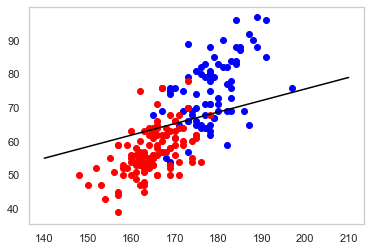

In [18]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], y=pesos.loc[pesos.sex=='F', 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

Vamos visualizar os dados classificados conferirmos se foram classificados de acordo com nossa superfície de decisão. Para isso classificamos esses mesmos dados, assim obtemos os rótulos dados durante o treinamento.

In [19]:
classified_reg = reg_log.predict(X)
classified_reg

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

Concatenamos esses dados (na forma de um dataframe), aos dados originais para conseguirmos plotá-los.

In [20]:
pesos_classified_reg = pd.concat([pesos, pd.DataFrame(classified_reg, columns=['classificado_reg'])], axis=1)

In [21]:
#pesos_classified_reg.head(100)

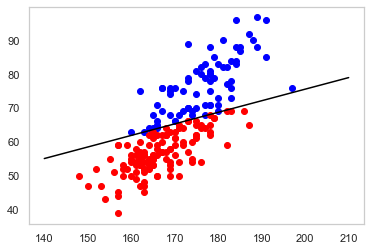

In [22]:
plt.scatter(x=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==1.0, 'height'], y=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==1.0, 'weight'], c='blue')
plt.scatter(x=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==0.0, 'height'], y=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==0.0, 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

Como esperado, os indivíduos "acima" da reta tem valor positivo em relação a ela, logo assumem a classe 1 (masculino). Já os "abaixo", possuem valor negativo e assumem a classe 0

Como o modelo de Regressão Logística é probabilístico, muitas vezes é interessante obtermos a probabilidade de um elemento pertencer à classe determinada. Neste caso usamos o método predict_proba()

In [30]:
novo_exemplo = [[75.00, 173]]

In [32]:
reg_log.predict_proba(novo_exemplo)

array([[0.12921413, 0.87078587]])

In [31]:
a = reg_log.predict(novo_exemplo)
a

array([1], dtype=uint8)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, classified_reg)
confusion_matrix
print(classification_report(y, classified_reg))

             precision    recall  f1-score   support

          0       0.80      0.86      0.83       111
          1       0.80      0.71      0.75        84

avg / total       0.80      0.80      0.80       195



Portanto, para nosso modelo, uma pessoa de 1,73m e 75Kg, a probabilidade de ser do sexo masculino é 87% e do feminino 13%

In [35]:
X.head()

,weight,height
0,77,182
1,58,161
2,53,161
3,68,177
4,59,157


Em um plano 3D conseguimer ver a sigmoid

In [36]:
from mpl_toolkits.mplot3d import Axes3D

In [37]:
weights = X['weight']

In [38]:
heights = X['height']

In [39]:
probs = pd.DataFrame(reg_log.predict_proba(X)[:,1], columns=['probs'])

In [40]:
pesos_classificados = pd.concat([X, probs], axis=1)

In [41]:
pesos_classificados.head()

,weight,height,probs
0,77,182,0.841570
1,58,161,0.283499
2,53,161,0.116413
3,68,177,0.516775
4,59,157,0.399877


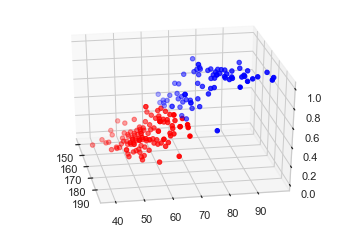

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'height'],
           ys=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'weight'], 
           zs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'probs'],
           c='blue', marker='o')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'height'],
           ys=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'weight'], 
           zs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'probs'],
           c='red', marker='o')
ax.azim = 350 #alterar o valore aqui para rotacionar o grafico


Podemos ver a superfície de decisão

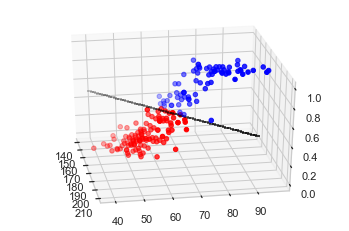

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'height'],
           ys=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'weight'], 
           zs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'probs'],
           c='blue', marker='o')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'height'],
           ys=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'weight'], 
           zs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'probs'],
           c='red', marker='o')
ax.scatter(xs=np.linspace(140, 210, 70),
           ys=np.linspace(40, 90, 70), 
           zs=np.ones(70)*0.5, marker='_', c='black')
ax.azim = 350